In [16]:
from matplotlib import pyplot as plt
import numpy as np

In [17]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: maximum fitness
3: top fitness (best fitness ever)
4: peak fitness (fitness earned with best single weight value by max individual)
5: median # of nodes in population
6: median # of connections in population]
"""
stats = np.loadtxt('lula/lula_1024_128_stats.out', delimiter=',')
task = "Sparse Mountain Car"  # "Lunar Lander"
pop_size = 128
save = True
out_path = 'lula/lula_1024_128_fitness.pdf'
runTime = np.loadtxt('sample_runTime.out', delimiter=',')

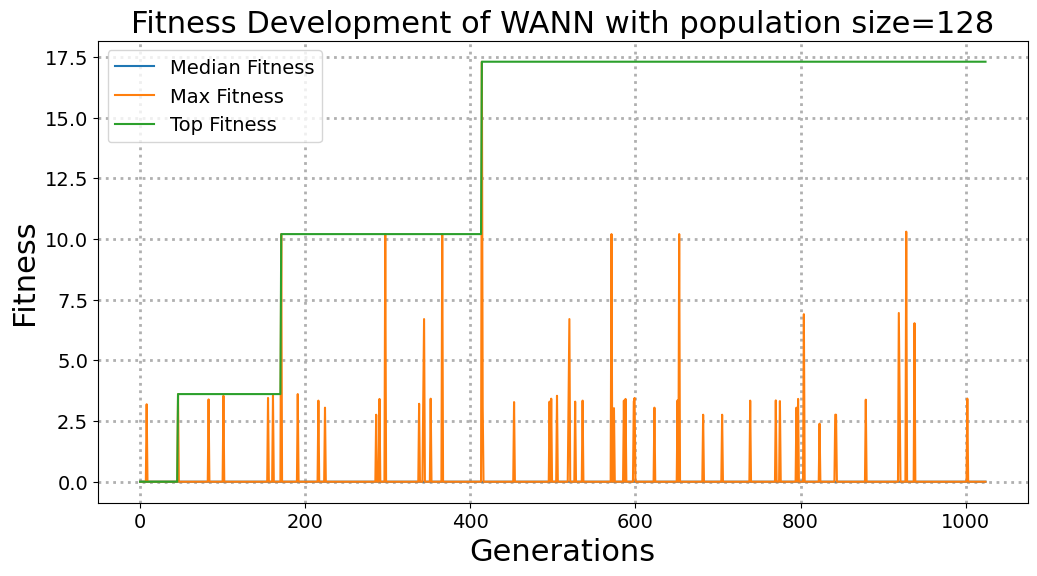

In [18]:
# Plot fitness progress:
plt.figure(figsize=(12,6))
plt.grid(linestyle='--', linewidth=0.1)
plt.plot(stats[:,1], label="Median Fitness")
plt.plot(stats[:,2], label="Max Fitness")
plt.plot(stats[:,3], label="Top Fitness")
# plt.plot(stats[:,4], label="Peak Fitness")
plt.legend(fontsize=14)
plt.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations', fontsize=22)
plt.ylabel('Fitness', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Approximate time on 8 cores
genKey = np.array([32,128,256,384,640,896],dtype=int)

for i in range(len(genKey)):
  gen = int(genKey[i]/8)-1
  time = runTime[gen]/3600
  #plt.annotate(str(round(time,1))+' hours', xy=(gen*8,0), xytext=(gen*8,-200),
  #             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

# plt.title('Sample Run of WANN Cart-Pole Swing-Up on 8 Core Laptop')
# plt.title(f'Sample Run of WANN {task} on 6 Core Laptop', fontsize=22)
plt.title(f'Fitness Development of WANN with population size={pop_size}', fontsize=22)
plt.savefig(out_path, bbox_inches='tight') if save else None
# plt.show()